# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import datetime as dt
from matplotlib import pyplot as plt

# 1.0 Load Data

Datasets downloaded from https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/UBIG3F

## 1.1 voter detail

In [2]:
# load each file and combine into a single dataframe
path = r'file_path'
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, 
                     sep='\t', 
                     header=None,
                     names=['county_code', 'voter_id', 'name_last', 'name_suffix', 
                            'name_first', 'name_middle', 'requested_public_records_exemption',
                           'residence_address_line_1', 'residence_address_line_2', 'residence_city',
                           'residence_state', 'residence_zipcode', 'mailing_address_line_1,',
                           'mailing_address_line_2', 'mailing_address_line_3', 'mailing_city',
                           'mailing_state', 'mailing_zipcode', 'mailing_country', 'gender', 'race',
                           'birth_date', 'registration_date', 'party_affiliation', 'precinct',
                           'precinct_group', 'precinct_split', 'precinct_suffix', 'voter_status',
                           'congressional_district', 'house_district', 'senate_district',
                           'county_commission_district', 'school_board_district', 'daytime_area_code',
                           'daytime_phone_number', 'daytime_phone_extension', 'email_address'])
    li.append(df)

detail = pd.concat(li, axis=0, ignore_index=True)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (11,14,17,18,27,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# convert date fields from object dtype to datetime
date_cache = {k: pd.to_datetime(k, errors='coerce') for k in detail['birth_date'].unique()}
detail['birth_date'] = detail['birth_date'].map(date_cache)

date_cache = {k: pd.to_datetime(k, errors='coerce') for k in detail['registration_date'].unique()}
detail['registration_date'] = detail['registration_date'].map(date_cache)

In [4]:
detail.head()

,county_code,voter_id,name_last,name_suffix,name_first,name_middle,requested_public_records_exemption,residence_address_line_1,residence_address_line_2,residence_city,...,voter_status,congressional_district,house_district,senate_district,county_commission_district,school_board_district,daytime_area_code,daytime_phone_number,daytime_phone_extension,email_address
0,CHA,102654245,Nodes,NaN,Melvin,R,N,8320 Riverside DR,UNIT 4179,Punta Gorda,...,ACT,17.0,75.0,26.0,1.0,1.0,941,5056229,NaN,
1,CHA,116777380,Oldbear,NaN,Kaili,Nicole,N,5016 Palangos DR,,Punta Gorda,...,ACT,17.0,75.0,26.0,1.0,1.0,NaN,NaN,NaN,KAILINICOLE@ROCKETMAIL.COM
2,CHA,111684516,Dunn,NaN,Cora,M,N,23053 Westchester BLVD,APT L501,Port Charlotte,...,ACT,17.0,75.0,26.0,1.0,1.0,NaN,NaN,NaN,
3,CHA,121565689,Espino,NaN,Melissa,Faye,N,2511 Luther RD,APT 225,Punta Gorda,...,ACT,17.0,75.0,26.0,1.0,1.0,NaN,NaN,NaN,
4,CHA,113812700,Eno,NaN,Camille,Marie,N,24437 Harborview RD,LOT 19,Port Charlotte,...,ACT,17.0,75.0,26.0,1.0,1.0,863,7098529,NaN,


In [5]:
detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13710358 entries, 0 to 13710357
Data columns (total 38 columns):
county_code                           object
voter_id                              int64
name_last                             object
name_suffix                           object
name_first                            object
name_middle                           object
requested_public_records_exemption    object
residence_address_line_1              object
residence_address_line_2              object
residence_city                        object
residence_state                       object
residence_zipcode                     object
mailing_address_line_1,               object
mailing_address_line_2                object
mailing_address_line_3                object
mailing_city                          object
mailing_state                         object
mailing_zipcode                       object
mailing_country                       object
gender                         

## 1.2 voter history

In [6]:
# load files and combine into single dataframe
path = r'file_path'
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, 
                     sep='\t', 
                     header=None,
                     names=['county_code', 'voter_id', 'election_date', 'election_type', 'history_code'])
    li.append(df)

hist = pd.concat(li, axis=0, ignore_index=True)

In [7]:
# convert date field from object dtype to datetime
date_cache = {k: pd.to_datetime(k) for k in hist['election_date'].unique()}
hist['election_date'] = hist['election_date'].map(date_cache)

In [8]:
hist.head()

,county_code,voter_id,election_date,election_type,history_code
0,PIN,100021934,2016-11-08,GEN,Y
1,PIN,100021442,2007-03-13,OTH,Y
2,PIN,100047465,2014-03-11,GEN,Y
3,PIN,100046570,2008-11-04,GEN,A
4,PIN,100052464,2014-11-04,GEN,Y


In [9]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72770189 entries, 0 to 72770188
Data columns (total 5 columns):
county_code      object
voter_id         int64
election_date    datetime64[ns]
election_type    object
history_code     object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.7+ GB


# 2.0 Check for fake birthdays

Look for fake birthdays by identifying a month/day with a high # of occurrences (e.g. many voters reported their birthday on 1/1)

In [10]:
# count the number of birthday occurences on each day of the year
bd = detail[['voter_id','birth_date']]
bd.loc[:,'day'] = detail.birth_date.dt.day
bd.loc[:,'month'] = detail.birth_date.dt.month
bd_count = pd.DataFrame(bd.groupby(['month','day']).voter_id.count().sort_values(ascending=False).rename('count')).reset_index()

df_p = pd.pivot_table(bd_count,'count','month','day')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [502]:
df_p.head()

day,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
month,,,,,,,,,,,,,,,,,,,,,
1.0,39229.0,35041.0,36307.0,36768.0,36710.0,37133.0,36564.0,36241.0,35919.0,37303.0,...,36554.0,36424.0,36529.0,36845.0,36678.0,36354.0,36805.0,36147.0,36244.0,35645.0
2.0,37163.0,38034.0,36823.0,36502.0,36955.0,36178.0,36935.0,36771.0,36644.0,37816.0,...,37529.0,36434.0,36807.0,36506.0,36476.0,36514.0,37554.0,8540.0,NaN,NaN
3.0,37407.0,37158.0,38005.0,36913.0,37110.0,36800.0,36620.0,36908.0,36185.0,36953.0,...,35856.0,35917.0,36074.0,36466.0,35705.0,35944.0,35826.0,35149.0,35410.0,35109.0
4.0,36061.0,35883.0,35365.0,36521.0,35716.0,35560.0,35825.0,35523.0,35213.0,36099.0,...,35136.0,35116.0,34917.0,35474.0,34632.0,34743.0,35784.0,35031.0,34722.0,NaN
5.0,36482.0,35337.0,35033.0,34931.0,36820.0,35349.0,35389.0,35463.0,34890.0,36120.0,...,35558.0,35347.0,35159.0,35865.0,35171.0,35170.0,35555.0,35306.0,34291.0,34107.0


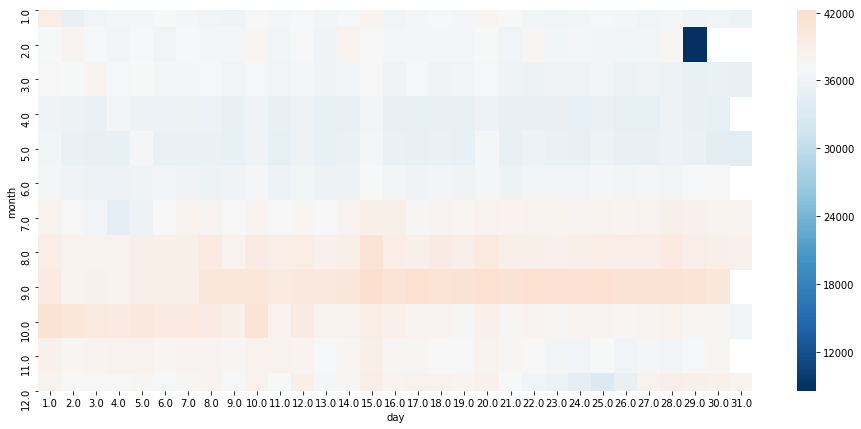

In [11]:
plt.figure(figsize=(16, 7))
sns.heatmap(df_p, cmap="RdBu_r", center=bd_count['count'].mean())

The only date that stands out as an outlier is February 29th, which is expected b/c it only occurrs on a leap year

# 3.0 Prepare Dataset for Analysis

Formula for proportion of people who voted = # of people who voted / # of eligible voters

Re: # of eligible voters - the "Did Not Vote" code is not used by all counties and they are not required to use it, which can be seen
in the chart below; voter turnout has historically been around 50%, so the 'N' code (purple bar) is vastly underreported.


This means there are many eligible voters that did not vote in an election, but are not included in the voter history table.
In order to get the denominator in the equation, join the voter history table with the voter registration detail table, and include in the 
dataset only those elections in which all voters who were registered on or before election day were eligible to vote  i.e. state-wide general elections.
This excludes local elections (city, district, county, etc.) where the eligible voters for those elections are unknown. It also excludes
primary elections where the voter's party affiliation at the time of the election is unknown, as the voter registration detail file only includes current
party affiliation which could have changed over time.

History Code

A	Voted Absentee                                                                                      
B	Absentee Ballot NOT Counted                                                                         
E	Voted Early                                                                                         
N	Did Not Vote     (not all counties use this code nor are required to report this data)                                                                                   
P	Provisional Ballot Not Counted                                                                      

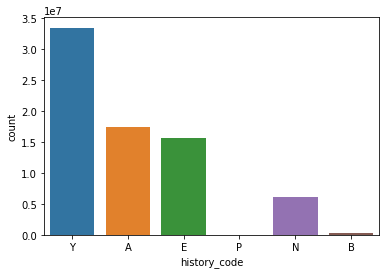

In [12]:
sns.countplot(hist.history_code)

In [13]:
# find the number of counties in the state
hist.county_code.nunique()

67

In [14]:
# limit dataset to general elections where all 67 counties participated, and voters that voted (history_code !='N')
unique_counties_grouped_by_election_date = pd.DataFrame(hist.groupby('election_date').county_code.nunique().rename('unique_counties'))
statewide_elections = unique_counties_grouped_by_election_date[unique_counties_grouped_by_election_date.unique_counties==67][[]].reset_index()
statewide_gen_elections = hist[(hist.election_type=='GEN') & (hist.history_code!='N')].merge(statewide_elections, how='inner', left_on='election_date', right_on='election_date')

# remove dupes
statewide_gen_elections.drop_duplicates(subset=['voter_id', 'election_date'], inplace=True)

In [15]:
# cartesion product of voter registration detail and statewide general election dates
election_dates = pd.Series(statewide_gen_elections.election_date.unique()).rename('election_date')
election_dates = pd.DataFrame(election_dates)
election_dates['key'] = 1

voters = detail[['voter_id', 'birth_date', 'registration_date']]
voters['key'] = 1

df = voters.merge(election_dates, left_on='key', right_on='key')
df.drop('key', inplace=True, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [16]:
# create column for eligible_voter 1 = eligible, 0 = not eligible
df['eligible_voter'] = np.where(df['registration_date'] <= df['election_date'], 1, 0)

# create column for voted 1 = yes
statewide_gen_elections['voted'] = 1

In [17]:
# left join on statewide_gen_elections to determine if voter voted in that election
df = df.merge(statewide_gen_elections[['voter_id','election_date','voted']], how='left', left_on=['voter_id','election_date'], right_on=['voter_id','election_date'])

In [18]:
# create column for voted 0 = no
df['voted'] = df.voted.fillna(value=0)

In [21]:
# only include eligible voters
df = df[df.eligible_voter == 1]

In [22]:
# drop null birthdays
df.dropna(subset=['birth_date'], inplace=True)

In [23]:
df.head(10)

,voter_id,birth_date,registration_date,election_date,eligible_voter,voted
0,102654245,1932-08-28,2003-10-21,2016-11-08,1,1.0
1,102654245,1932-08-28,2003-10-21,2008-11-04,1,1.0
2,102654245,1932-08-28,2003-10-21,2014-11-04,1,1.0
3,102654245,1932-08-28,2003-10-21,2010-11-02,1,1.0
4,102654245,1932-08-28,2003-10-21,2012-11-06,1,1.0
5,102654245,1932-08-28,2003-10-21,2006-11-07,1,1.0
6,116777380,1989-08-31,2008-09-17,2016-11-08,1,0.0
7,116777380,1989-08-31,2008-09-17,2008-11-04,1,1.0
8,116777380,1989-08-31,2008-09-17,2014-11-04,1,0.0
9,116777380,1989-08-31,2008-09-17,2010-11-02,1,0.0


In [24]:
# calculate the difference in number of days between birth_date and election_date
df['bd_day_of_month'] = df.birth_date.dt.day.astype(str)
df['bd_month_of_year'] = df.birth_date.dt.month.astype(str)
df['election_year'] = df.election_date.dt.year.astype(str)
df['birthday_election_year'] = pd.to_datetime(df['election_year'] + '-' + df['bd_month_of_year'] + '-' + df['bd_day_of_month'], errors='coerce')

df['days'] = df.birthday_election_year.dt.dayofyear - df.election_date.dt.dayofyear

In [25]:
df.head()

,voter_id,birth_date,registration_date,election_date,eligible_voter,voted,bd_day_of_month,bd_month_of_year,election_year,birthday_election_year,days
0,102654245,1932-08-28,2003-10-21,2016-11-08,1,1.0,28,8,2016,2016-08-28,-72.0
1,102654245,1932-08-28,2003-10-21,2008-11-04,1,1.0,28,8,2008,2008-08-28,-68.0
2,102654245,1932-08-28,2003-10-21,2014-11-04,1,1.0,28,8,2014,2014-08-28,-68.0
3,102654245,1932-08-28,2003-10-21,2010-11-02,1,1.0,28,8,2010,2010-08-28,-66.0
4,102654245,1932-08-28,2003-10-21,2012-11-06,1,1.0,28,8,2012,2012-08-28,-70.0


In [504]:
# check that where days==0, month/day of birth_date matches month/day of election_date
df[df.days==0].head()

,voter_id,birth_date,registration_date,election_date,eligible_voter,voted,bd_day_of_month,bd_month_of_year,election_year,birthday_election_year,days
107,102543125,1925-11-07,1977-11-14,2006-11-07,1,1.0,7,11,2006,2006-11-07,0.0
822,102655195,1936-11-08,2003-11-20,2016-11-08,1,1.0,8,11,2016,2016-11-08,0.0
919,102578136,1937-11-04,1992-12-02,2008-11-04,1,1.0,4,11,2008,2008-11-04,0.0
920,102578136,1937-11-04,1992-12-02,2014-11-04,1,1.0,4,11,2014,2014-11-04,0.0
1118,118439279,1991-11-04,2010-09-27,2014-11-04,1,1.0,4,11,2014,2014-11-04,0.0


# 4.0 Analysis

In [339]:
# avg voter turnout grouped by election_date. Looking at these, analysis should be split between midterms and presidential elections
df.groupby('election_date').voted.mean()

election_date
2006-11-07    0.502186
2008-11-04    0.795450
2010-11-02    0.504147
2012-11-06    0.730437
2014-11-04    0.490624
2016-11-08    0.703307
Name: voted, dtype: float64

## 4.1 Midterms

### 4.1.1 Voter turnout

In [467]:
# average voter turnout for midterm elections
midterms = df[df.election_date.isin(['2006-11-07', '2010-11-02', '2014-11-04'])]

midterms.voted.mean()*100

49.80733069978231

### 4.1.2 Voter turnout grouped by # of days from birthday (0 = birthday)

In [468]:
# group by number of days from birthday and calculate the proportion of eligible voters that voted (i.e. voter turnout)
midterms_turnout_groupby_days_from_birthday = pd.DataFrame(midterms.groupby('days').voted.mean()*100).reset_index()

#### Day Before vs. Day After

In [469]:
midterms_turnout_groupby_days_from_birthday[midterms_turnout_groupby_days_from_birthday.days.isin([item for item in range(-1, 2)])]

,days,voted
309,-1.0,49.142572
310,0.0,50.326030
311,1.0,49.789866


#### +/- 30 days

(49, 50.5)

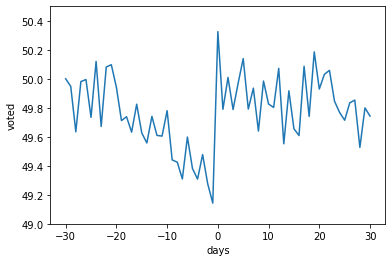

In [490]:
sns.lineplot(x='days',
             y='voted', 
             data=midterms_turnout_groupby_days_from_birthday[midterms_turnout_groupby_days_from_birthday.days.isin([item for item in range(-30, 31)])]
            )
plt.ylim(49,50.5)

### 4.1.3 Change from previous day

In [472]:
# calculate the % change in voter turnout from the previous day
midterms_change_from_prev_day = (midterms_turnout_groupby_days_from_birthday.set_index('days').diff()).reset_index()

#### Day Before vs. Day After

In [473]:
midterms_change_from_prev_day[midterms_change_from_prev_day.days.isin([item for item in range(-1, 2)])]

,days,voted
309,-1.0,-0.133540
310,0.0,1.183458
311,1.0,-0.536164


#### +/- 30 days

(-0.6, 1.25)

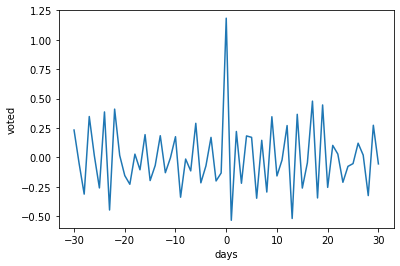

In [495]:
sns.lineplot(x='days',
             y='voted', 
             data=midterms_change_from_prev_day[midterms_change_from_prev_day.days.isin([item for item in range(-30, 31)])]
            )
plt.ylim(-.6,1.25)

## 4.2 Presidential

### 4.2.1 Voter turnout

In [481]:
# average voter turnout for presidential elections
presidential = df[df.election_date.isin(['2008-11-04', '2012-11-06', '2016-11-08'])]

presidential.voted.mean()*100

73.65227608807345

### 4.1.2 Voter turnout grouped by # of days from birthday (0 = birthday)

In [484]:
# group by number of days from birthday and calculate the proportion of eligible voters that voted (i.e. voter turnout)
presidential_turnout_groupby_days_from_birthday = pd.DataFrame(presidential.groupby('days').voted.mean()*100).reset_index()

#### Day Before vs. Day After

In [485]:
presidential_turnout_groupby_days_from_birthday[presidential_turnout_groupby_days_from_birthday.days.isin([item for item in range(-1, 2)])]

,days,voted
311,-1.0,73.797279
312,0.0,74.064020
313,1.0,73.717312


#### +/- 30 days

(73, 74.5)

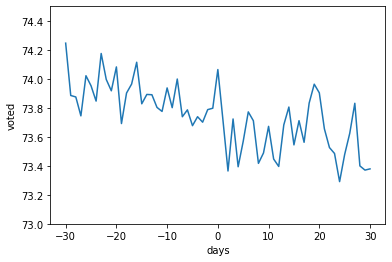

In [491]:
sns.lineplot(x='days',
             y='voted', 
             data=presidential_turnout_groupby_days_from_birthday[presidential_turnout_groupby_days_from_birthday.days.isin([item for item in range(-30, 31)])]
            )
# make y-axis same scale as midterms (max - min = 1.5)
plt.ylim(73,74.5)

### 4.1.3 Change from previous day

In [487]:
# calculate the % change in voter turnout from the previous day
presidential_change_from_prev_day = (presidential_turnout_groupby_days_from_birthday.set_index('days').diff()).reset_index()

#### Day Before vs. Day After

In [488]:
presidential_change_from_prev_day[presidential_change_from_prev_day.days.isin([item for item in range(-1, 2)])]

,days,voted
311,-1.0,0.009658
312,0.0,0.266741
313,1.0,-0.346708


#### +/- 30 days

(-1, 0.85)

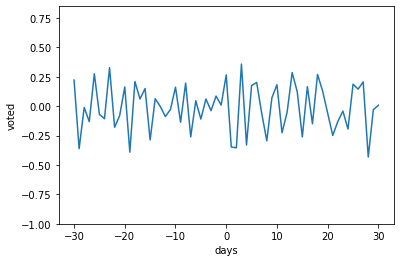

In [501]:
sns.lineplot(x='days',
             y='voted', 
             data=presidential_change_from_prev_day[presidential_change_from_prev_day.days.isin([item for item in range(-30, 31)])]
            )
# make y-axis same scale as midterms (max - min = 1.85)
plt.ylim(-1,.85)